In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','OBS_CPTEC')

In [3]:
sys.exit()

SystemExit: 

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Read raw data

In [4]:
list_files = glob.glob(os.path.join(dir_base,'raw','*.txt'))
list_files = sorted(list_files)
list_len = len(list_files)
print(f'Number of files: {list_len}')

Number of files: 7


In [5]:
filename = os.path.join(dir_base,list_files[-1])
DATA = pd.read_csv(filename)
DATA.head(5)

,code,lon,lat,alt,date,r
0,8589,-23.48,14.9400,-9999,20240101,0.0
1,78925,-60.99,14.5953,5,20240101,0.0
2,78947,-61.00,14.0100,2,20240101,0.4
3,78948,-60.95,13.7500,3,20240101,0.0
4,80001,-81.71,12.5800,1,20240101,0.0


In [6]:
DATA['is_valid'] = DATA['r'] != np.nan
# DATA_sorted = DATA.sort_values(by='is_valid', ascending=False)
# DATA_clear = DATA_sorted.drop_duplicates(subset=['lat', 'lon'], keep='first')
# DATA_clear = DATA_clear.drop(columns='is_valid')
# DATA_clear = DATA_clear.reset_index(drop=True)

Text(0.0, 1.0, 'Number of stations: 1018639')

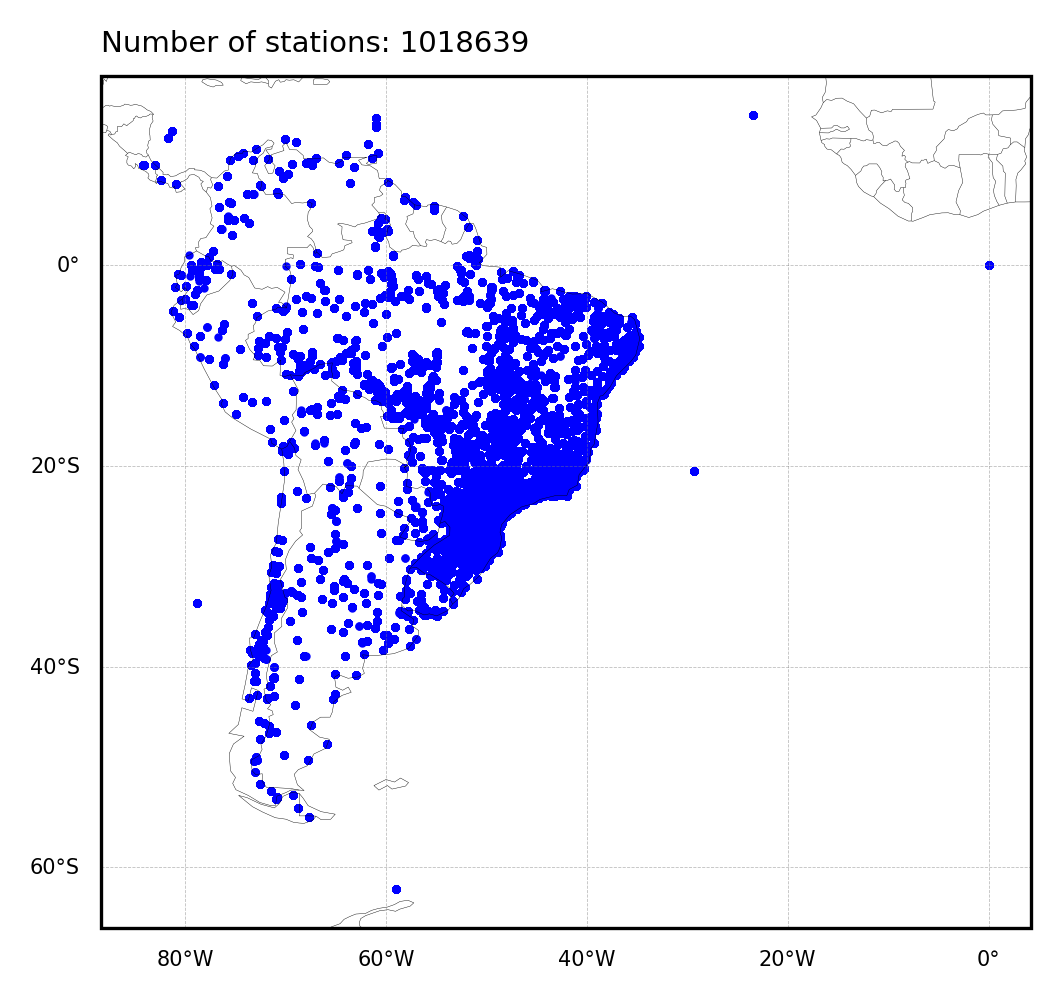

In [7]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([SP_lon_min, SP_lon_max, SP_lat_min, SP_lat_max],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.scatter(DATA['lon'],DATA['lat'],s=1,marker='o',color='b',transform=proj)

ax1.set_title(f'Number of stations: {len(DATA)}', loc='left', fontsize=7)

In [8]:
sys.exit()

SystemExit: 

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Extract Id and create individual files

In [9]:
code_list = DATA['code'].values 
code_unique = np.unique(code_list)
print(f'Number of stations: {len(code_unique)}')

Number of stations: 3586


In [8]:
for pos in range(len(code_unique)):
    print(f'Station: {code_unique[pos]}')
    df_list = []
    for nn in range(list_len):
        filename = os.path.join(dir_base,list_files[nn])
        DATA = pd.read_csv(filename)
        DATA_ref = DATA[DATA['code']==code_unique[pos]]
        if not DATA_ref.empty:
            df_list.append(DATA_ref)

    DATA_all = pd.concat(df_list, ignore_index=True)
    DATA_all['date'] = pd.to_datetime(DATA_all['date'].astype(str), format='%Y%m%d')
    dir_out = os.path.join(dir_base,'clear',f'obs_cptec_{code_unique[pos]}.csv')
    DATA_all.to_csv(dir_out, header=True, index=False)

Station: -9999
Station: 02042051
Station: 02142096
Station: 10100000
Station: 10200000
Station: 10500000
Station: 10910000
Station: 11400000
Station: 11500000
Station: 12100000
Station: 12240000
Station: 12351000
Station: 12370000
Station: 12390000
Station: 12500000
Station: 12510500
Station: 12520000
Station: 12540000
Station: 12550000
Station: 12557000
Station: 12590000
Station: 12640000
Station: 12650000
Station: 12680000
Station: 12700000
Station: 12840000
Station: 12842000
Station: 12845000
Station: 12850000
Station: 12880000
Station: 12900001
Station: 13100000
Station: 13150003
Station: 13169900
Station: 13180000
Station: 13300000
Station: 13310000
Station: 13405000
Station: 13410000
Station: 13439000
Station: 13450000
Station: 13470000
Station: 13540000
Station: 13550000
Station: 13568000
Station: 13572000
Station: 13578000
Station: 13600002
Station: 13610001
Station: 13650000
Station: 13710001
Station: 13870000
Station: 13885000
Station: 13962000
Station: 13990000
Station: 1410

In [5]:
sys.exit()

SystemExit: 

## Complete dates

In [13]:
TIME_REF = pd.date_range(start=f'2018-01-01', end=f'2024-12-31', freq='d')
TIME_PD = pd.DataFrame({'date':TIME_REF})
print(f'Number of times: {len(TIME_PD)}')

Number of times: 2557


In [14]:
list_files = glob.glob(os.path.join(dir_base,'clear','*.csv'))
list_files = sorted(list_files)
list_len = len(list_files)
print(f'Number of files: {list_len}')

Number of files: 3585


In [27]:
for nn in range(list_len):
    filename = list_files[nn].split('/')[-1].split('.')[0]
    data = pd.read_csv(list_files[nn])
    data['date'] = pd.to_datetime(data['date'])

    data_rdy = pd.merge(data, TIME_PD, on='date', how='right')

    print(len(data),len(data_rdy))

    dir_out = os.path.join(dir_base,'rdy',f'{filename}.csv')
    data_rdy.to_csv(dir_out, header=True, index=False)

1820 2557
2192 2557
2253 2557
1637 2557
3762 4438
1078 2557
1437 2557
1713 2557
1942 2557
1322 2557
2315 2557
2089 2557
1965 2557
2152 2557
2388 2557
1951 2557
3150 4132
806 2557
1423 2557
2139 2557
1529 2557
2009 2557
1186 2557
1924 2557
1998 2557
1816 2557
1089 2557
1571 2557
1717 2557
2194 2557
1567 2557
1806 2557
1089 2557
2002 2557
172 2557
2354 2557
1516 2557
1693 2557
1638 2557
2384 2557
1966 2557
1415 2557
2049 2557
1989 2557
2005 2557
2427 2557
2345 2557
1653 2557
3512 4313
1668 2557
3880 4497
1377 2557
1916 2557
2000 2557
2461 2557
1964 2557
1718 2557
1457 2557
2122 2557
727 2557
2177 2557
2399 2557
2443 2557
4188 4651
2473 2557
613 2557
2474 2557
2378 2557
2471 2557
2137 2557
2498 2557
2494 2557
2256 2557
2063 2557
1765 2557
2337 2557
1156 2557
1077 2557
2058 2557
2049 2557
576 2557
615 2557
2305 2557
2035 2557
2014 2557
1935 2557
2021 2557
2005 2557
1583 2557
1380 2557
1925 2557
2046 2557
2053 2557
2037 2557
2055 2557
2046 2557
2078 2557
2008 2557
1920 2557
1847 2557
2134 2